### Fatma Betül Özgün HW 3  

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import cluster as clu
from sklearn import preprocessing as pre
from sklearn import pipeline as pip
from sklearn import datasets as dat
from sklearn import decomposition as dec
from sklearn import manifold as man
from scipy.cluster import hierarchy
from sklearn import compose as com
import plotly.graph_objects as go
from sklearn import neighbors as nn
from sklearn import metrics as met
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.impute import  SimpleImputer

### Question 1  

In [36]:
data = pd.read_csv("drinks.csv")
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [37]:
#Countries List 
country_list = data["country"]

In [38]:
#Continents List 
continent_list = data["continent"]

In [39]:
#Dropping country and continent
data.drop(["country", "continent"], axis=1, inplace=True)
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


In [40]:
data.dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

In [41]:
data.isnull().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

#### Using Elbow Technique to Decide Number of Clusters 

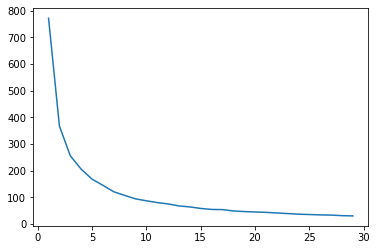

In [42]:
x_values = []
y_values = []

for i in range(1, 30):
    pipe = pip.Pipeline([
          ("scaler", pre.StandardScaler()),
          ("kmeans", clu.KMeans(n_clusters=i, random_state=42))
    ])
    pipe.fit(data)
    x_values.append(i)
    y_values.append(pipe.named_steps["kmeans"].inertia_)

plt.plot(x_values, y_values)
plt.show()

In [43]:
pipe = pip.Pipeline([
        ("scaler", pre.StandardScaler()),
        ("pca", dec.PCA(random_state=42)),
])
pipe.fit(data)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(random_state=42))])

#### Using PCA 

In [44]:
def plot_component_cumulative_importance(pipe_pca, stepName):
    ratios = pipe_pca.named_steps[stepName].explained_variance_ratio_

    x_values = []
    y_values = []

    total = 0
    for i in range(0, len(ratios)):
        x_values.append(i+1)
        total += ratios[i]
        y_values.append(total)

    plt.plot(x_values, y_values)
    plt.grid(True)
    plt.show()

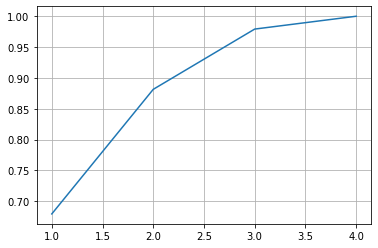

In [45]:
plot_component_cumulative_importance(pipe, "pca")

In [46]:
pipe[1].explained_variance_ratio_[:2].sum()

0.8814695789174477

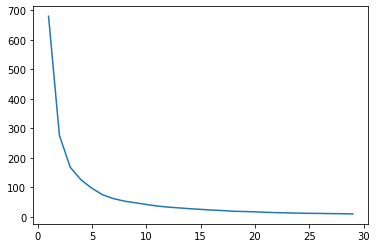

In [47]:
x_values = []
y_values = []

for i in range(1, 30):
    pipe = pip.Pipeline([
          ("scaler", pre.StandardScaler()),
          ("pca", dec.PCA(n_components=2)),
          ("kmeans", clu.KMeans(n_clusters=i, random_state=42))
  ])
    pipe.fit(data)
    x_values.append(i)
    y_values.append(pipe.named_steps["kmeans"].inertia_)

plt.plot(x_values, y_values)
plt.show()

In [48]:
pipe = pip.Pipeline([
          ("scaler", pre.StandardScaler()),
          ("kmeans", clu.KMeans(n_clusters=5, random_state=42))
  ])
pipe.fit(data)

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

#### Displaying Cluster Results on a World Map

In [49]:
fig = go.Figure(data=go.Choropleth(
    locations = country_list,
    locationmode = "country names",
    z = pipe[1].labels_,
    text = country_list,
    colorscale = 'RdBu',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'ClusterNo:',
))

fig.update_layout(
    title_text='Clustering Results',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

### Question 2  

In [51]:
house = pd.read_csv("housing.csv")
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [52]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [53]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Section 1 

*****Displaying the Median House Value Based on Latitude and Longitude*****

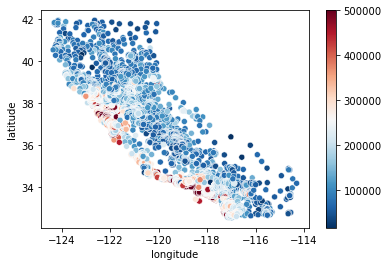

In [56]:
x_value=house["longitude"]
y_value=house["latitude"]
ax=sns.scatterplot(x=x_value, y=y_value, hue=house["median_house_value"],palette="RdBu_r")
norm = plt.Normalize(house["median_house_value"].min(),house["median_house_value"].max())
sm = plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm)
ax.get_legend().remove()
sm.set_array([])
ax.figure.colorbar(sm)
plt.show()

#### Section 2

#### 1- Using KMeans Algorithm 

In [58]:
#Dropping median_house_value
house.drop(["median_house_value"], axis=1, inplace=True)
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [63]:
x_values = []
y_values = []
pipe_cat = pip.Pipeline([
            ("one_hot", pre.OneHotEncoder(handle_unknown="ignore", sparse=False))
])

pipe_num = pip.Pipeline([
                         ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                         ("scaler", pre.StandardScaler())
])

ct = com.ColumnTransformer([
              ("num", pipe_num, house.select_dtypes(exclude="object").columns),
              ("cat", pipe_cat, ["ocean_proximity"]),
])

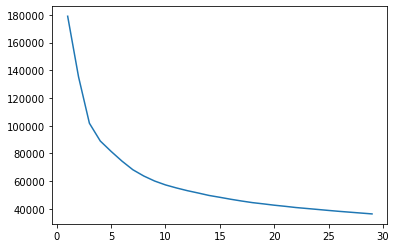

In [64]:
for i in range(1, 30):
    pipe = pip.Pipeline([
                       ("ct", ct),
                       ("kmeans", clu.KMeans(n_clusters=i, random_state=42))
  ])
    pipe.fit(house)
    x_values.append(i)
    y_values.append(pipe.named_steps["kmeans"].inertia_)

plt.plot(x_values, y_values)
plt.show()

In [71]:
pipe = pip.Pipeline([
                       ("ct", ct),
                       ("kmeans", clu.KMeans(n_clusters=9, random_state=42))
  ])
pipe.fit(house)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                      

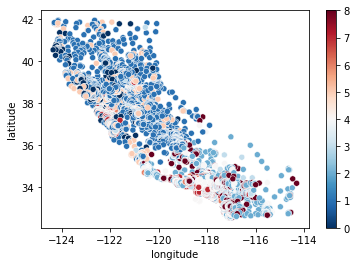

In [72]:
x_value= house["longitude"]
y_value= house["latitude"]
ax=sns.scatterplot(x=x_value, y=y_value, hue=pipe.named_steps["kmeans"].labels_,palette="RdBu_r")
norm = plt.Normalize(pipe.named_steps["kmeans"].labels_.min(),pipe.named_steps["kmeans"].labels_.max())
sm = plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm)
ax.get_legend().remove()
sm.set_array([])
ax.figure.colorbar(sm)
plt.show()

#### 2- Using DBSCAN Algorithm 

#### a) Determining eps Value

In [75]:
pipen = pip.Pipeline([
              ("ct", ct),
              ("nn", nn.NearestNeighbors(n_neighbors=10, algorithm="kd_tree"))])

pipen.fit(house)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                      

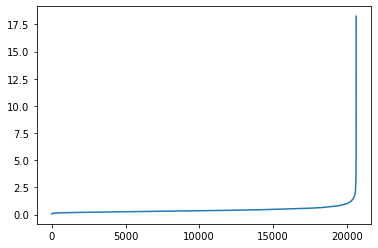

In [77]:
distances, indices=pipen[1].kneighbors()
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

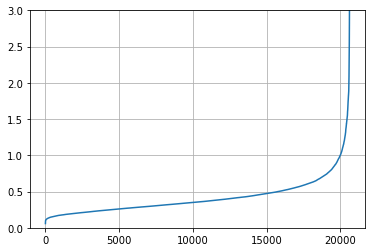

In [78]:
plt.ylim(0,3)
plt.grid(True)
plt.plot(distances)

#### b) Applying DBSCAN Algorithm 

In [80]:
pipe_db = pip.Pipeline([
           ("ct", ct),
           ("dbscan", clu.DBSCAN(eps=1, algorithm="kd_tree", min_samples=10))])

pipe_db.fit(house)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                      

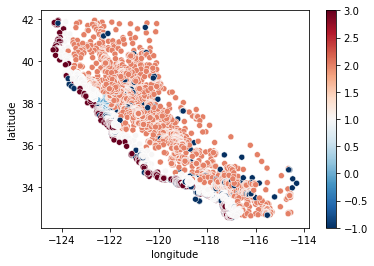

In [81]:
x_value= house["longitude"]
y_value= house["latitude"]
ax=sns.scatterplot(x=x_value, y=y_value, hue=pipe_db.named_steps["dbscan"].labels_,palette="RdBu_r")
norm = plt.Normalize(pipe_db.named_steps["dbscan"].labels_.min(),pipe_db.named_steps["dbscan"].labels_.max())
sm = plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm)
ax.get_legend().remove()
sm.set_array([])
ax.figure.colorbar(sm)
plt.show()